In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/laptop_price - dataset.csv")
pd.set_option('display.max_columns', None)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


#Dataset Structure

In [3]:
df.shape

(1275, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [5]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [6]:
df.dtypes

,0
Company,object
Product,object
TypeName,object
Inches,float64
ScreenResolution,object
CPU_Company,object
CPU_Type,object
CPU_Frequency (GHz),float64
RAM (GB),int64
Memory,object


In [7]:
df.rename(columns={"CPU_Frequency (GHz)":"Frequency_GHz","RAM (GB)":"RAM_GB","Weight (kg)":"Weight_kg"},inplace=True)

#Object & Numerical Columns

In [8]:
obj = df.select_dtypes(include="object").columns.values
print(f"Object Columns({len(obj)}):",end="\n------------------\n")
for i in obj:
  print(i)

Object Columns(10):
------------------
Company
Product
TypeName
ScreenResolution
CPU_Company
CPU_Type
Memory
GPU_Company
GPU_Type
OpSys


In [9]:
num = df.select_dtypes(include=np.number).columns.values
print(f"Numerical Columns({len(num)}):",end="\n--------------------\n")
for i in num:
  print(i)

Numerical Columns(5):
--------------------
Inches
Frequency_GHz
RAM_GB
Weight_kg
Price (Euro)


#Splitting ScreenResolution


In [10]:
df["ScreenResolution"].head()

,ScreenResolution
0,IPS Panel Retina Display 2560x1600
1,1440x900
2,Full HD 1920x1080
3,IPS Panel Retina Display 2880x1800
4,IPS Panel Retina Display 2560x1600


In [11]:
def sep_st(res):
  lst = res.split()
  if len(lst) == 1:
    return "Not Specified"
  else:
    return " ".join(lst[:-1])
df["ScreenType"] = df["ScreenResolution"].apply(sep_st)

In [12]:
def sep_sr(res):
  lst = res.split()
  return "".join(lst[-1])
df["ScreenResolution"] = df["ScreenResolution"].apply(sep_sr)

In [13]:
# IPS Panel Touchscreen / 4K Ultra HD to IPS Panel 4K Ultra HD / Touchscreen
def ScreenType(dis):
  if dis == "IPS Panel Touchscreen / 4K Ultra HD":
    return "IPS Panel 4K Ultra HD / Touchscreen"
  else:
    return dis
df["ScreenType"] = df["ScreenType"].apply(ScreenType)

In [14]:
def Touch(dis):
  if "Touchscreen" in dis:
    return "Yes"
  else:
    return "No"
df["TouchScreen"] = df["ScreenType"].apply(Touch)

In [15]:
df[["ScreenResolution","ScreenType","TouchScreen"]].head()

,ScreenResolution,ScreenType,TouchScreen
0,2560x1600,IPS Panel Retina Display,No
1,1440x900,Not Specified,No
2,1920x1080,Full HD,No
3,2880x1800,IPS Panel Retina Display,No
4,2560x1600,IPS Panel Retina Display,No


# Splitting Memory

In [16]:
df["Memory"].tail(20)

,Memory
1255,1TB HDD
1256,128GB SSD + 1TB HDD
1257,500GB HDD
1258,1.0TB Hybrid
1259,128GB SSD + 1TB HDD
1260,128GB SSD
1261,512GB SSD
1262,1TB HDD
1263,500GB HDD
1264,500GB HDD


In [17]:
def sep_m(mem):
  sum = 0
  lst = mem.split()
  for i in lst:
    if "GB" in i:
      num = ""
      for j in i:
        if j.isnumeric():
          num += j
      sum += int(num)
    elif "TB" in i:
      num = 0
      for j in i:
        if j.isnumeric():
          num += int(j)
      num = int(num)*1024
      sum += num
  return sum

df["Total_Memory"] = df["Memory"].apply(sep_m)

In [18]:
df["Total_Memory"].tail(20)

,Total_Memory
1255,1024
1256,1152
1257,500
1258,1024
1259,1152
1260,128
1261,512
1262,1024
1263,500
1264,500


#Price Euro to Rs

In [19]:
df["Price (Euro)"].head()

,Price (Euro)
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [20]:
def convert(euro):
  return int(int(euro)*89.57)
df["Price (Euro)"] = df["Price (Euro)"].apply(convert)
df.rename(columns={"Price (Euro)":"Price_Rs"},inplace=True)

In [21]:
df["Price_Rs"].head()

,Price_Rs
0,119934
1,80433
2,51502
3,227239
4,161494


#Category Classification


In [22]:
def frequency(Ghz):
  if Ghz <= 1.8:
    return "Low Frequency"
  elif Ghz <= 2.8:
    return "Average Frequency"
  else:
    return "High Frequency"

df["Frequency_Category"] = df["Frequency_GHz"].apply(frequency)

In [23]:
def ram(Gb):
  if Gb <= 4:
    return "Low RAM"
  elif Gb <= 16:
    return "Average RAM"
  else:
    return "High RAM"

df["RAM_Category"] = df["RAM_GB"].apply(ram)

In [24]:
def memory(Gb):
  if Gb <= 512:
    return "Low Memory"
  elif Gb <= 1024:
    return "Average Memory"
  else:
    return "High Memory"

df["Memory_Category"] = df["Total_Memory"].apply(memory)

In [25]:
def price(Rs):
  if Rs <= 40000:
    return "Low Budget"
  elif Rs <= 70000:
    return "Average Budget"
  else:
    return "High Budget"

df["Price_Category"] = df["Price_Rs"].apply(price)

In [26]:
df[["Frequency_GHz","Frequency_Category","RAM_GB","RAM_Category","Total_Memory","Memory_Category","Price_Rs","Price_Category"]].head()

,Frequency_GHz,Frequency_Category,RAM_GB,RAM_Category,Total_Memory,Memory_Category,Price_Rs,Price_Category
0,2.3,Average Frequency,8,Average RAM,128,Low Memory,119934,High Budget
1,1.8,Low Frequency,8,Average RAM,128,Low Memory,80433,High Budget
2,2.5,Average Frequency,8,Average RAM,256,Low Memory,51502,Average Budget
3,2.7,Average Frequency,16,Average RAM,512,Low Memory,227239,High Budget
4,3.1,High Frequency,8,Average RAM,256,Low Memory,161494,High Budget


#Columns ReArrange

In [27]:
df = df[['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'ScreenType','TouchScreen', 'CPU_Company', 'CPU_Type', 'Frequency_GHz',
       'Frequency_Category', 'RAM_GB', 'RAM_Category', 'Memory',
       'Total_Memory', 'Memory_Category', 'GPU_Company', 'GPU_Type',
       'OpSys', 'Weight_kg', 'Price_Rs', 'Price_Category']]

In [28]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'ScreenType', 'TouchScreen', 'CPU_Company', 'CPU_Type', 'Frequency_GHz',
       'Frequency_Category', 'RAM_GB', 'RAM_Category', 'Memory',
       'Total_Memory', 'Memory_Category', 'GPU_Company', 'GPU_Type', 'OpSys',
       'Weight_kg', 'Price_Rs', 'Price_Category'],
      dtype='object')

In [29]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,ScreenType,TouchScreen,CPU_Company,CPU_Type,Frequency_GHz,Frequency_Category,RAM_GB,RAM_Category,Memory,Total_Memory,Memory_Category,GPU_Company,GPU_Type,OpSys,Weight_kg,Price_Rs,Price_Category
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,IPS Panel Retina Display,No,Intel,Core i5,2.3,Average Frequency,8,Average RAM,128GB SSD,128,Low Memory,Intel,Iris Plus Graphics 640,macOS,1.37,119934,High Budget
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Not Specified,No,Intel,Core i5,1.8,Low Frequency,8,Average RAM,128GB Flash Storage,128,Low Memory,Intel,HD Graphics 6000,macOS,1.34,80433,High Budget
2,HP,250 G6,Notebook,15.6,1920x1080,Full HD,No,Intel,Core i5 7200U,2.5,Average Frequency,8,Average RAM,256GB SSD,256,Low Memory,Intel,HD Graphics 620,No OS,1.86,51502,Average Budget
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,IPS Panel Retina Display,No,Intel,Core i7,2.7,Average Frequency,16,Average RAM,512GB SSD,512,Low Memory,AMD,Radeon Pro 455,macOS,1.83,227239,High Budget
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,IPS Panel Retina Display,No,Intel,Core i5,3.1,High Frequency,8,Average RAM,256GB SSD,256,Low Memory,Intel,Iris Plus Graphics 650,macOS,1.37,161494,High Budget


#Bar Plots

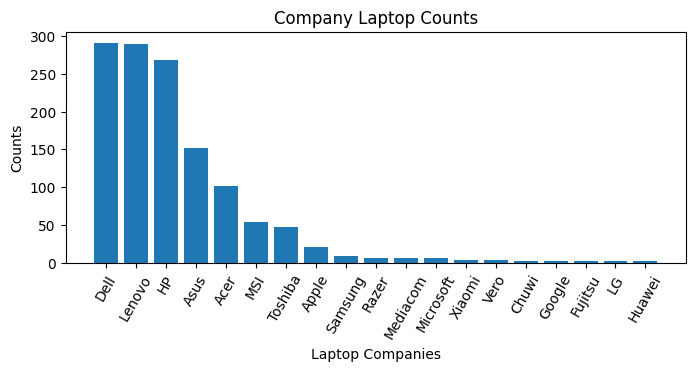

In [30]:
plt.figure(figsize = (8,3))
plt.bar(x = df["Company"].value_counts().index, height = df["Company"].value_counts())
plt.xticks(rotation=60)
plt.title("Company Laptop Counts")
plt.xlabel("Laptop Companies")
plt.ylabel("Counts")
plt.show()

*   There are 19 different Companies
*   Dell Company has the most Laptops
*   Huawei Company has the least Laptops

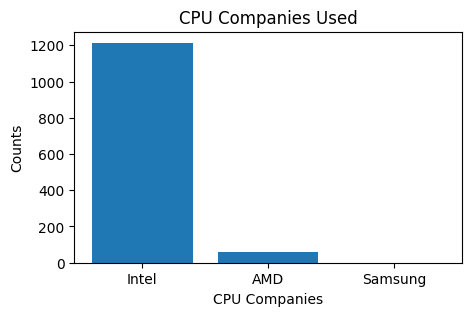

In [31]:
plt.figure(figsize = (5,3))
plt.bar(x = df["CPU_Company"].value_counts().index, height = df["CPU_Company"].value_counts())
plt.title("CPU Companies Used")
plt.xlabel("CPU Companies")
plt.ylabel("Counts")
plt.show()

*   There are 3 different Companies
*   Intel was used more
*   Samsung was least used



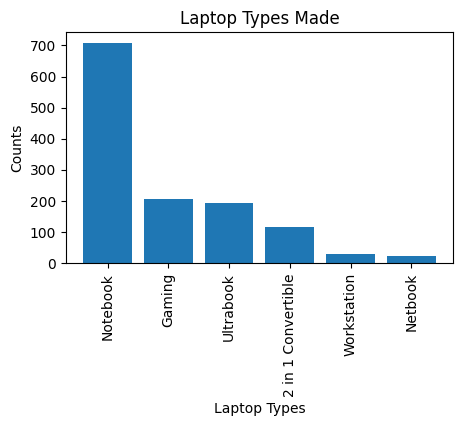

In [32]:
plt.figure(figsize = (5,3))
plt.bar(x = df["TypeName"].value_counts().index, height = df["TypeName"].value_counts())
plt.xticks(rotation=90)
plt.title("Laptop Types Made")
plt.xlabel("Laptop Types")
plt.ylabel("Counts")
plt.show()

*   There are 6 Laptop Types
*   Notebooks are more made
*   Netbooks are less made

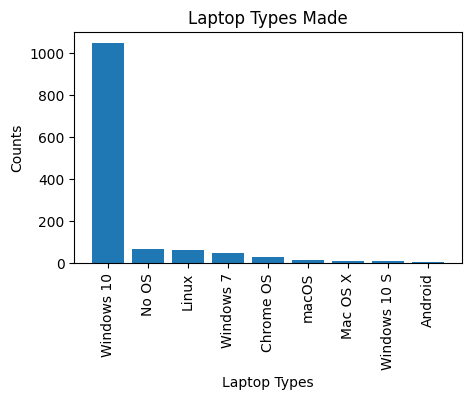

In [33]:
plt.figure(figsize = (5,3))
plt.bar(x = df["OpSys"].value_counts().index, height = df["OpSys"].value_counts())
plt.xticks(rotation=90)
plt.title("Laptop Types Made")
plt.xlabel("Laptop Types")
plt.ylabel("Counts")
plt.show()

Most used OS Ranges from:
*   Windows, Linux, Chrome, Mac, Android



#Bar Plot Category Classifications

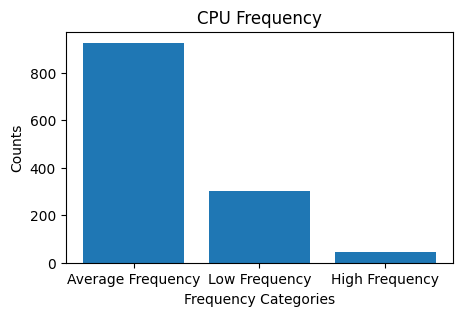

In [34]:
plt.figure(figsize = (5,3))
plt.bar(x = df["Frequency_Category"].value_counts().index, height = df["Frequency_Category"].value_counts())
plt.title("CPU Frequency")
plt.xlabel("Frequency Categories")
plt.ylabel("Counts")
plt.show()

*   Laptops with Average Frequencies are more made
*   Laptops with High Frequencies are less made

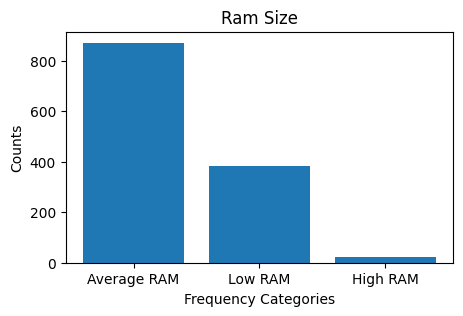

In [35]:
plt.figure(figsize = (5,3))
plt.bar(x = df["RAM_Category"].value_counts().index, height = df["RAM_Category"].value_counts())
plt.title("Ram Size")
plt.xlabel("Frequency Categories")
plt.ylabel("Counts")
plt.show()

*   Laptops with Average RAM size are more made
*   Laptops with High RAM size are less made

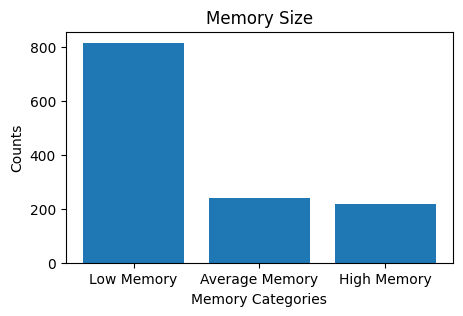

In [36]:
plt.figure(figsize = (5,3))
plt.bar(x = df["Memory_Category"].value_counts().index, height = df["Memory_Category"].value_counts())
plt.title("Memory Size")
plt.xlabel("Memory Categories")
plt.ylabel("Counts")
plt.show()

*   Laptops with Low Memory are more made
*   Laptops with High Memory are less made

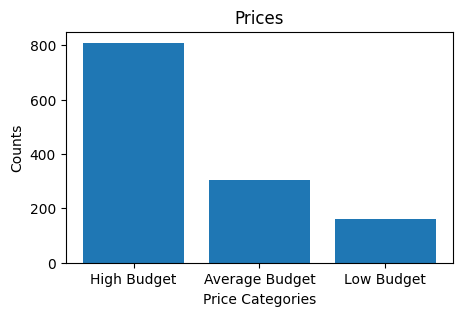

In [37]:
plt.figure(figsize = (5,3))
plt.bar(x = df["Price_Category"].value_counts().index, height = df["Price_Category"].value_counts())
plt.title("Prices")
plt.xlabel("Price Categories")
plt.ylabel("Counts")
plt.show()

*   Laptops with High Budgets are more made
*   Laptops with Low Budgets are less made
*   So there is no guarantee that with more Price comes the Best Laptop

#Pie Chart

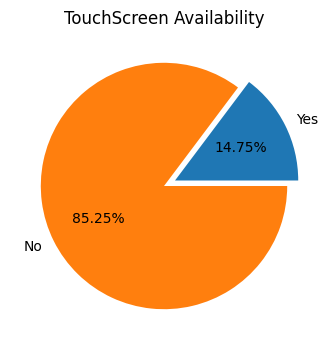

In [38]:
x = len(df[df["TouchScreen"] == "Yes"].values)
y = len(df[df["TouchScreen"] == "No"].values)
arr = np.array([x,y])

plt.figure(figsize=(5,4))
plt.pie(x=arr,labels=["Yes","No"],autopct="%1.2f%%",explode=[0.1,0])
plt.title("TouchScreen Availability")
plt.show()

*   TouchScreen are Lesser made compared to NormalScreen

#HeatMap

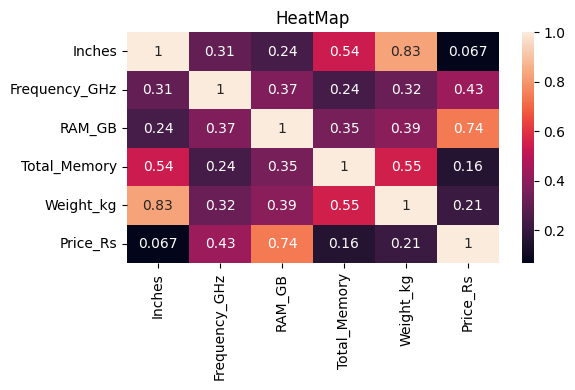

In [39]:
plt.figure(figsize=(6,3))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("HeatMap")
plt.show()

*   CPU Frequency & RAM Size increases highly with the Price
*   Inches & Total Memory increases highly with the weight

#Other

In [40]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,ScreenType,TouchScreen,CPU_Company,CPU_Type,Frequency_GHz,Frequency_Category,RAM_GB,RAM_Category,Memory,Total_Memory,Memory_Category,GPU_Company,GPU_Type,OpSys,Weight_kg,Price_Rs,Price_Category
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,IPS Panel Retina Display,No,Intel,Core i5,2.3,Average Frequency,8,Average RAM,128GB SSD,128,Low Memory,Intel,Iris Plus Graphics 640,macOS,1.37,119934,High Budget
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Not Specified,No,Intel,Core i5,1.8,Low Frequency,8,Average RAM,128GB Flash Storage,128,Low Memory,Intel,HD Graphics 6000,macOS,1.34,80433,High Budget
2,HP,250 G6,Notebook,15.6,1920x1080,Full HD,No,Intel,Core i5 7200U,2.5,Average Frequency,8,Average RAM,256GB SSD,256,Low Memory,Intel,HD Graphics 620,No OS,1.86,51502,Average Budget
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,IPS Panel Retina Display,No,Intel,Core i7,2.7,Average Frequency,16,Average RAM,512GB SSD,512,Low Memory,AMD,Radeon Pro 455,macOS,1.83,227239,High Budget
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,IPS Panel Retina Display,No,Intel,Core i5,3.1,High Frequency,8,Average RAM,256GB SSD,256,Low Memory,Intel,Iris Plus Graphics 650,macOS,1.37,161494,High Budget


In [41]:
Companies = df["Company"].value_counts().index.values

df.groupby("Company")["Price_Rs"].min().sort_values()
df.groupby("Company")["Price_Rs"].max().sort_values()

df["Price_Rs"].max()
df["Price_Rs"].min()

df[df["Price_Rs"] == df["Price_Rs"].max()]
df[df["Price_Rs"] == df["Price_Rs"].min()]

df_new = df[["Company","Frequency_Category","RAM_Category","Memory_Category","Price_Category"]]

df[(df["Frequency_Category"] == "Low Frequency") & (df["RAM_Category"] == "Low RAM") & (df["Memory_Category"] == "Low Memory")]
df[(df["Frequency_Category"] == "Average Frequency") & (df["RAM_Category"] == "Average RAM") & (df["Memory_Category"] == "Average Memory")]
df[(df["Frequency_Category"] == "High Frequency") & (df["RAM_Category"] == "Average RAM") & (df["Memory_Category"] == "High Memory")]
df[(df["Frequency_Category"] == "High Frequency") & (df["RAM_Category"] == "High RAM") & (df["Memory_Category"] == "High Memory")]

,Company,Product,TypeName,Inches,ScreenResolution,ScreenType,TouchScreen,CPU_Company,CPU_Type,Frequency_GHz,Frequency_Category,RAM_GB,RAM_Category,Memory,Total_Memory,Memory_Category,GPU_Company,GPU_Type,OpSys,Weight_kg,Price_Rs,Price_Category
177,MSI,GT80S 6QF-074US,Gaming,18.4,1920x1080,Full HD,No,Intel,Core i7 6920HQ,2.9,High Frequency,32,High RAM,512GB SSD + 1TB HDD,1536,High Memory,Nvidia,GTX 980 SLI,Windows 10,4.4,250706,High Budget
238,Asus,ROG G703VI-E5062T,Gaming,17.3,1920x1080,Full HD,No,Intel,Core i7 7820HK,2.9,High Frequency,32,High RAM,512GB SSD + 1TB HDD,1536,High Memory,Nvidia,GeForce GTX 1080,Windows 10,4.7,348427,High Budget


In [42]:
df.columns
var = df["ScreenType"].value_counts().index.sort_values()
for i in var:
  print(i)

4K Ultra HD
4K Ultra HD / Touchscreen
Full HD
Full HD / Touchscreen
IPS Panel
IPS Panel 4K Ultra HD
IPS Panel 4K Ultra HD / Touchscreen
IPS Panel Full HD
IPS Panel Full HD / Touchscreen
IPS Panel Quad HD+
IPS Panel Quad HD+ / Touchscreen
IPS Panel Retina Display
IPS Panel Touchscreen
Not Specified
Quad HD+
Quad HD+ / Touchscreen
Touchscreen
Touchscreen / 4K Ultra HD
Touchscreen / Full HD
Touchscreen / Quad HD+


In [43]:
df.to_csv("Laptop_Price.csv",index=False)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1275 non-null   object 
 1   Product             1275 non-null   object 
 2   TypeName            1275 non-null   object 
 3   Inches              1275 non-null   float64
 4   ScreenResolution    1275 non-null   object 
 5   ScreenType          1275 non-null   object 
 6   TouchScreen         1275 non-null   object 
 7   CPU_Company         1275 non-null   object 
 8   CPU_Type            1275 non-null   object 
 9   Frequency_GHz       1275 non-null   float64
 10  Frequency_Category  1275 non-null   object 
 11  RAM_GB              1275 non-null   int64  
 12  RAM_Category        1275 non-null   object 
 13  Memory              1275 non-null   object 
 14  Total_Memory        1275 non-null   int64  
 15  Memory_Category     1275 non-null   object 
 16  GPU_Co